In [1]:
# gives us access to numerical calculations
import numpy as np
import pandas as pd 
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
dataset = pd.read_csv("weatherHistory.csv")

In [7]:
X = dataset["Humidity"]
X

0        0.89
1        0.86
2        0.89
3        0.83
4        0.83
         ... 
96448    0.43
96449    0.48
96450    0.56
96451    0.60
96452    0.61
Name: Humidity, Length: 96453, dtype: float64

In [8]:
y = dataset["Temperature (C)"]

In [9]:
# Transforming the dataset into numpy arrays
X = X.to_numpy().reshape(-1, 1)
y = y.to_numpy().reshape(-1, 1)

## Visualize the data

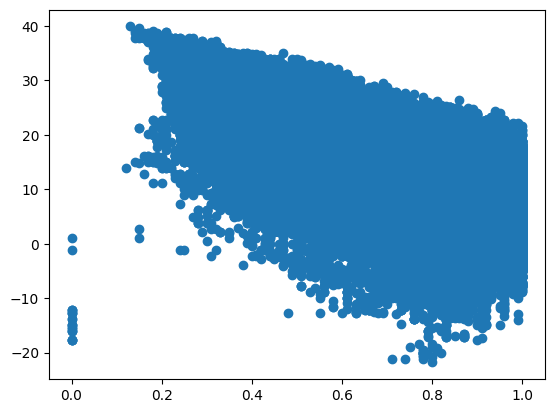

In [10]:
plot(X, y, 'o')

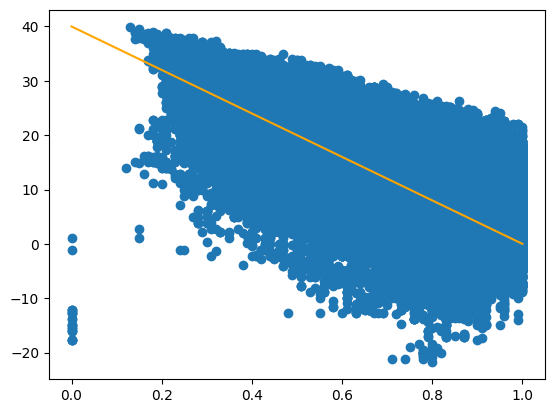

In [14]:
# a prediction based on the weight vector 0.1,0.2
w = np.array([40, -40])

def plot_model_and_data(w, X, y):
    # make predictions for 1000 values between 0.0 and 5.0
    x_test = np.linspace(0, 1, 1000).reshape(-1,1)

    # also add the columns of ones
    X_test = np.hstack( (np.ones((len(x_test),1)), x_test))
    y_pred = np.dot(X_test, w)

    # plot the test data and the prediction data
    plot(X, y, 'o')
    plot(X_test[:,1], y_pred, 'orange')
    
plot_model_and_data(w, X, y)

## How you would solve it in a real-life project?

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [15]:
# Add ones for the intercept
num_rows = X.shape[0]
ones = np.ones((num_rows, 1))
X = np.hstack((ones, X))

[[ 34.63692913 -30.89438376]]


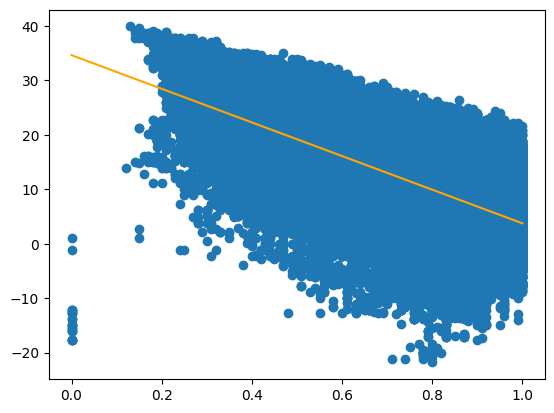

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression


reg = LinearRegression(fit_intercept = False).fit(X, y) # We already have a column of ones, so no intercept needed
print(reg.coef_)

plot_model_and_data(reg.coef_[0], X[:, 1], y)

# Evaluation
Let's further evaluate our model. For this, we calculate the MSE on the whole dataset:

In [17]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X)

mse = mean_squared_error(y, y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 54.761829807719856


Let's evaluate our model properly with two seperate datasets, a train dataset and a validation dataset:

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[[ 34.65474644 -30.9101215 ]]


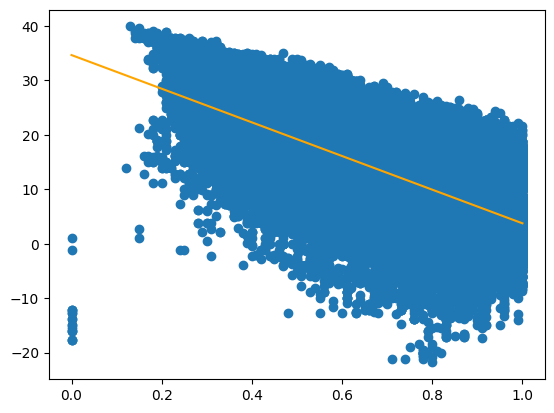

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = False).fit(X_train, y_train)

print(reg.coef_)

plot_model_and_data(reg.coef_[0], X_train[:, 1], y_train)

Now we want to see how our model performs on the unseen test data:

Mean squared error: 55.68387891640231


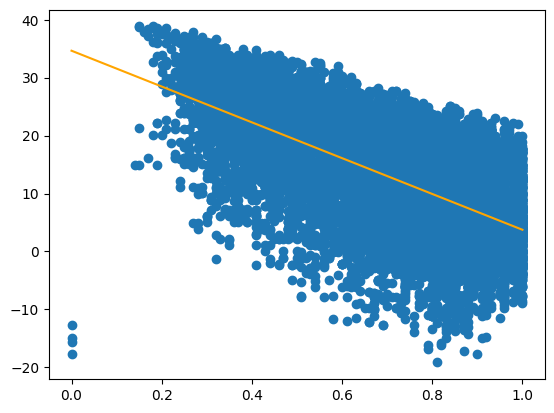

In [20]:
plot_model_and_data(reg.coef_[0], X_test[:, 1], y_test)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

# TODO evaluate MSE on train and test split

# More features
Do we get an advantage of using more features?

In [46]:
X_features = [dataset[["Apparent Temperature (C)", "Humidity"]],dataset[["Apparent Temperature (C)", "Humidity","Wind Speed (km/h)"]],dataset[["Apparent Temperature (C)", "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)"]],dataset[["Apparent Temperature (C)", "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)"]],dataset[["Apparent Temperature (C)", "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover","Pressure (millibars)"]]]

In [30]:
# TODO fill in actual feature names
X_full = dataset[["Apparent Temperature (C)", "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover","Pressure (millibars)"]]

y = dataset["Temperature (C)"]

In [52]:
import itertools

features = ["Apparent Temperature (C)", "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover","Pressure (millibars)"]
combinations= []
for r in range(1,len(features)+1):
    combinations.extend(list(itertools.combinations(features,r)))
for combo in combinations:
    print(list(combo))

['Apparent Temperature (C)']
['Humidity']
['Wind Speed (km/h)']
['Wind Bearing (degrees)']
['Visibility (km)']
['Loud Cover']
['Pressure (millibars)']
['Apparent Temperature (C)', 'Humidity']
['Apparent Temperature (C)', 'Wind Speed (km/h)']
['Apparent Temperature (C)', 'Wind Bearing (degrees)']
['Apparent Temperature (C)', 'Visibility (km)']
['Apparent Temperature (C)', 'Loud Cover']
['Apparent Temperature (C)', 'Pressure (millibars)']
['Humidity', 'Wind Speed (km/h)']
['Humidity', 'Wind Bearing (degrees)']
['Humidity', 'Visibility (km)']
['Humidity', 'Loud Cover']
['Humidity', 'Pressure (millibars)']
['Wind Speed (km/h)', 'Wind Bearing (degrees)']
['Wind Speed (km/h)', 'Visibility (km)']
['Wind Speed (km/h)', 'Loud Cover']
['Wind Speed (km/h)', 'Pressure (millibars)']
['Wind Bearing (degrees)', 'Visibility (km)']
['Wind Bearing (degrees)', 'Loud Cover']
['Wind Bearing (degrees)', 'Pressure (millibars)']
['Visibility (km)', 'Loud Cover']
['Visibility (km)', 'Pressure (millibars)']
['L

In [31]:
X = X_full.to_numpy()
y = y.to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
reg = LinearRegression(fit_intercept = False).fit(X_train, y_train) 
print(reg.coef_)


[[ 8.84234470e-01 -3.97851450e-01  9.23809747e-02 -1.65899034e-04
   2.28777988e-02  0.00000000e+00  1.39359549e-03]]


In [ ]:
y_pred_on_test = reg.predict(X_test)
y_pred_on_train = reg.predict(X_train)

mse_on_train = mean_squared_error(y_train, y_pred_on_train)
mse_on_test = mean_squared_error(y_test, y_pred_on_test)

print(f"MSE on train set: {mse_on_train}")
print(f"MSE on test set: {mse_on_test}")

In [57]:
y = dataset["Temperature (C)"]
bestmse=55
bestcombo=""
for combo in combinations:
    y = dataset[["Temperature (C)"]]
    X_full = dataset[list(combo)]
    X = X_full.to_numpy()
    y = y.to_numpy().reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LinearRegression(fit_intercept = False).fit(X_train, y_train) 
    #print(reg.coef_)
    y_pred_on_test = reg.predict(X_test)
    y_pred_on_train = reg.predict(X_train)

    mse_on_train = mean_squared_error(y_train, y_pred_on_train)
    mse_on_test = mean_squared_error(y_test, y_pred_on_test)
    if mse_on_test < bestmse:
        bestmse=mse_on_test
        bestcombo=combo
print(f"Bestcombo: {bestcombo}")
print(f"Best MSE: {bestmse}")

Bestcombo: ('Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)')
Best MSE: 0.9607783223412849
